In [2]:
#Import basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data preprocessing libraries
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

#Model training and Validation
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [3]:
#Importing datafile as dataframe

df=pd.read_excel(r'C:\Users\ElectionData1.xlsx',parse_dates=['time'])
df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,TerritÃ³rio Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [4]:
df.shape

(21643, 28)

In [5]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [6]:
df.dtypes

TimeElapsed                          int64
time                        datetime64[ns]
territoryName                       object
totalMandates                        int64
availableMandates                    int64
numParishes                          int64
numParishesApproved                  int64
blankVotes                           int64
blankVotesPercentage               float64
nullVotes                            int64
nullVotesPercentage                float64
votersPercentage                   float64
subscribedVoters                     int64
totalVoters                          int64
pre.blankVotes                       int64
pre.blankVotesPercentage           float64
pre.nullVotes                        int64
pre.nullVotesPercentage            float64
pre.votersPercentage               float64
pre.subscribedVoters                 int64
pre.totalVoters                      int64
Party                               object
Mandates                             int64
Percentage 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

Observation:
    1.there are 21643 rows and 28 columns in the above dataset.
    2.Only two columns are of object datatype.
    3.there are no missing values present.

In [8]:
#Checking null values
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

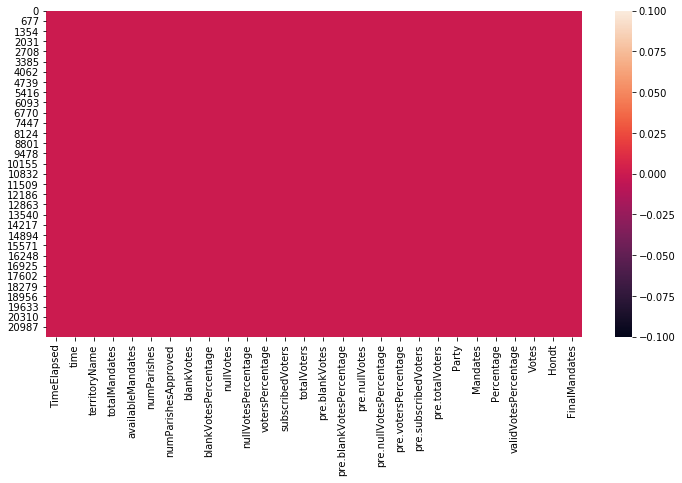

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

## Statistical Summary

In [10]:
#checking the statistics of numerical variables

df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [11]:
#Checking the correlation
df.corr()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,...,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,...,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,...,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,...,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,...,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,...,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,...,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,...,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,...,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,...,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


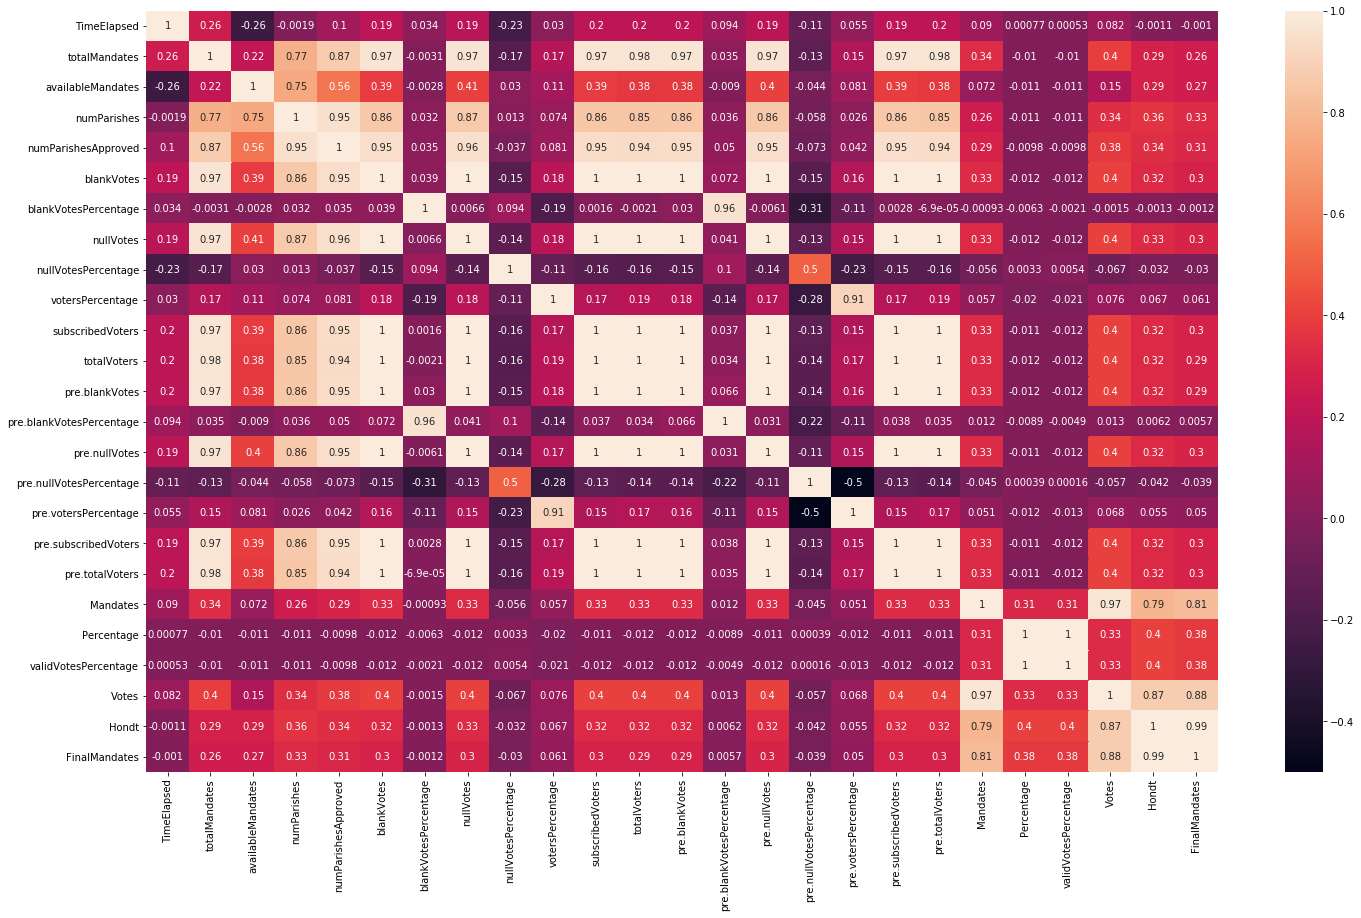

In [13]:
#Checking correlation using heatmap

plt.figure(figsize=(24,14))
sns.heatmap(df.corr(),annot=True)

Observation:
    1.Most of the features are highly correlated with each other.
    2.few highly correlted features will be removed.

### Exploratory Data Analysis 

In [14]:
for i in df.columns:
    print(i)
    print('Number of unique values:',df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('***************************************************************')

TimeElapsed
Number of unique values: 54
count    21643.000000
mean       133.146052
std         77.651193
min          0.000000
25%         65.000000
50%        135.000000
75%        200.000000
max        265.000000
Name: TimeElapsed, dtype: float64
***************************************************************
time
Number of unique values: 54
count                   21643
unique                     54
top       2019-10-06 21:00:01
freq                      403
first     2019-10-06 20:10:02
last      2019-10-07 00:35:01
Name: time, dtype: object
***************************************************************
territoryName
Number of unique values: 21
count     21643
unique       21
top       Braga
freq       1134
Name: territoryName, dtype: object
***************************************************************
totalMandates
Number of unique values: 62
count    21643.000000
mean        11.544795
std         31.314567
min          0.000000
25%          1.000000
50%          4.000000
75% 

In [15]:
print('Number of unique values in df')
for i in df:
    print(i,'--->',df[i].nunique())

Number of unique values in df
TimeElapsed ---> 54
time ---> 54
territoryName ---> 21
totalMandates ---> 62
availableMandates ---> 69
numParishes ---> 20
numParishesApproved ---> 219
blankVotes ---> 329
blankVotesPercentage ---> 146
nullVotes ---> 331
nullVotesPercentage ---> 107
votersPercentage ---> 282
subscribedVoters ---> 335
totalVoters ---> 336
pre.blankVotes ---> 323
pre.blankVotesPercentage ---> 130
pre.nullVotes ---> 329
pre.nullVotesPercentage ---> 90
pre.votersPercentage ---> 278
pre.subscribedVoters ---> 331
pre.totalVoters ---> 331
Party ---> 21
Mandates ---> 67
Percentage ---> 1363
validVotesPercentage ---> 1387
Votes ---> 4029
Hondt ---> 41
FinalMandates ---> 17


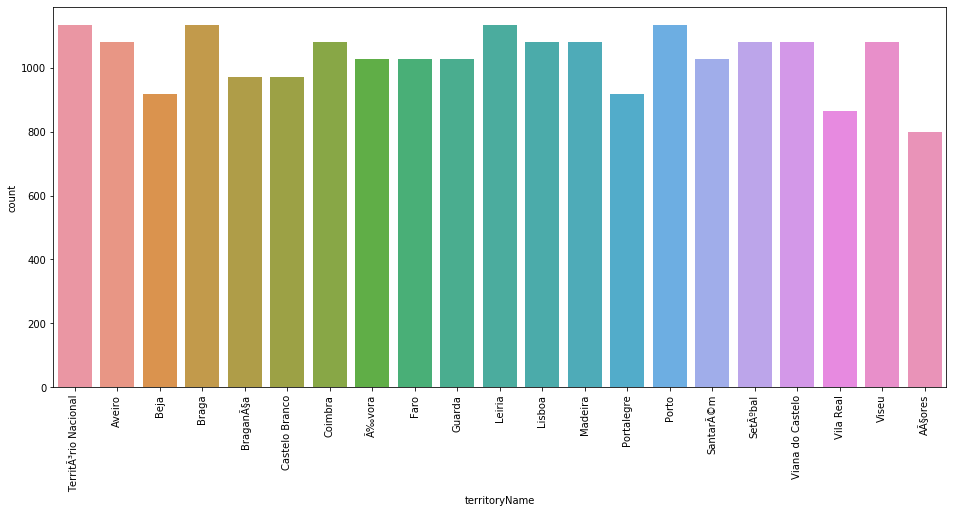

In [16]:
#Univariate analysis
plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
sns.countplot(df['territoryName'])

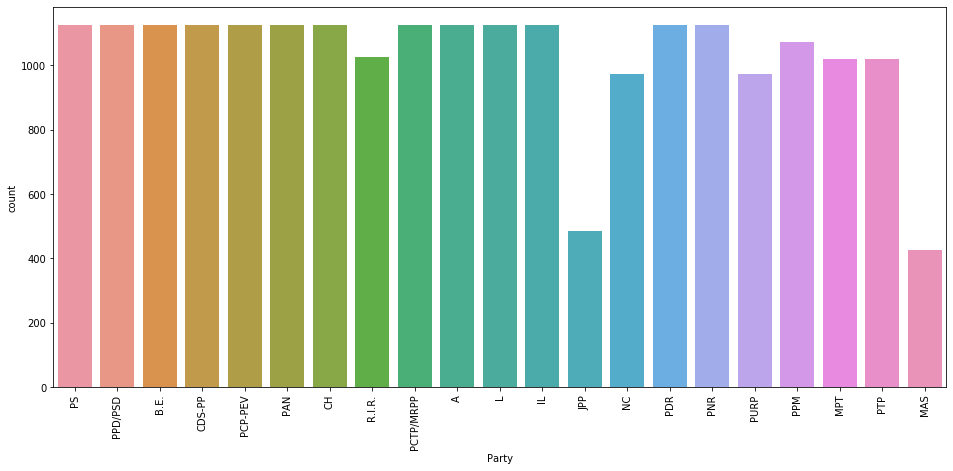

In [18]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=90)
sns.countplot(df['Party'])

### Data Visualisation of Numerical columns using Histogram

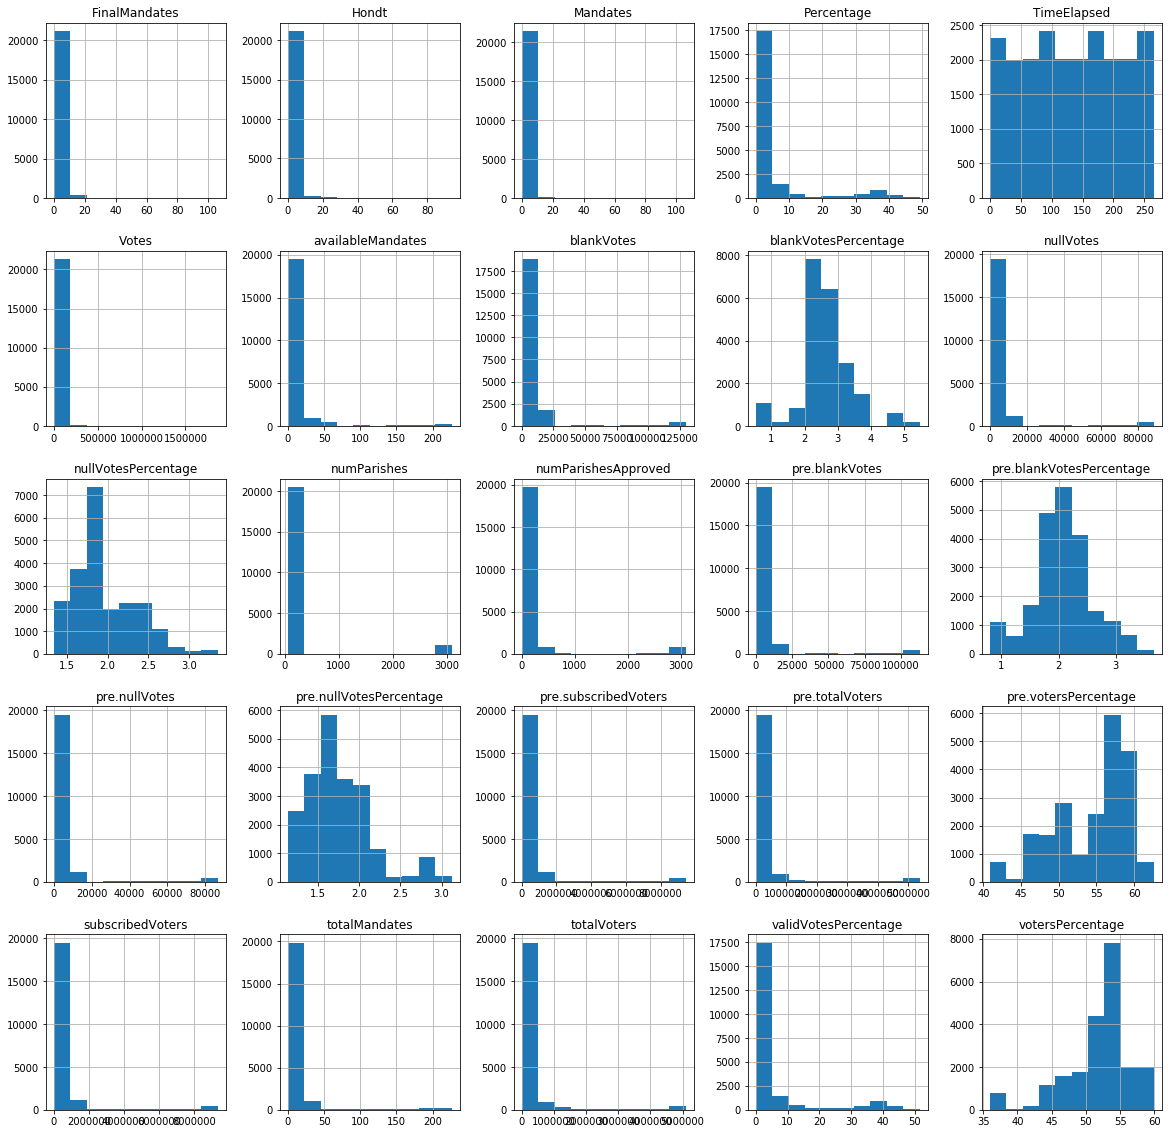

In [19]:
df.hist(figsize=(20,20))
plt.show()

In [20]:
#Bivariate analysis

df['TimeElapsed'].unique()

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265], dtype=int64)

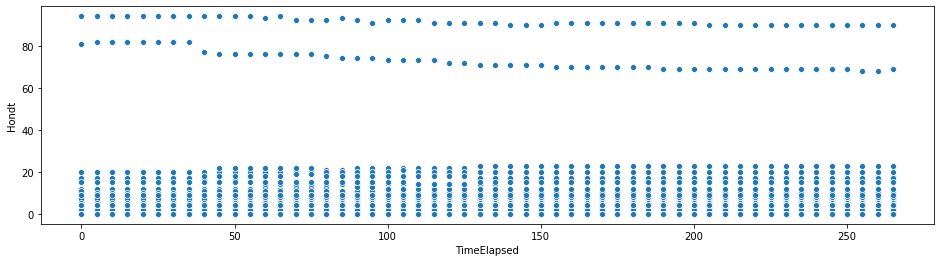

In [21]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='TimeElapsed',y='Hondt',data=df)

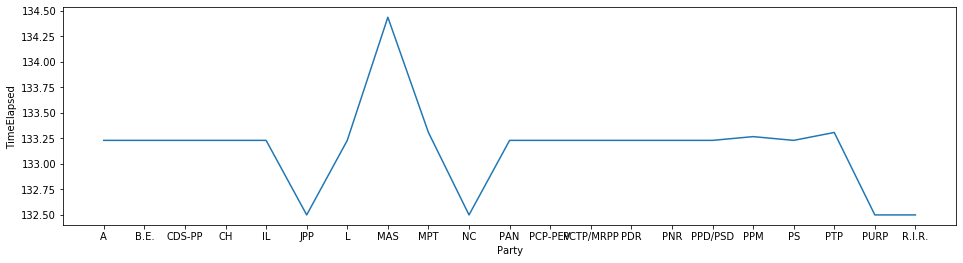

In [22]:
plt.figure(figsize=(16,4))
sns.lineplot(x='Party',y='TimeElapsed',data=df,ci=None)

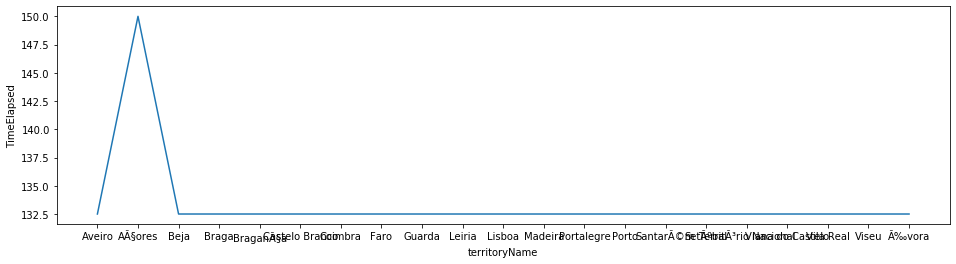

In [24]:
plt.figure(figsize=(16,4))
sns.lineplot(x='territoryName',y='TimeElapsed',data=df,ci=None)

In [25]:
#Dropping unwanted columns

df.drop(columns=['blankVotes','nullVotes','pre.blankVotes','pre.nullVotes','time'],axis=1,inplace=True)

In [27]:
#Checking Skewness

print (df.skew())
print("Total count of numeric features:",len(df.skew()))
print("Count of features which are significantly skewed",len(df.skew().loc[abs(df.skew())>0.5]))


TimeElapsed                 -0.005496
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotesPercentage         0.069627
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotesPercentage     0.021609
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandates               12.402865
dtype: float64
Total count of numeric features: 21
Count of features which are significantly skewed 18


Observation:
    Out of 21 features 18 features are skewed.

In [28]:
#Treating the skewness in dataset
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])

In [29]:
print (df.skew())
print("Total count of numeric features:",len(df.skew()))
print("Count of features which are significantly skewed",len(df.skew().loc[abs(df.skew())>0.5]))


TimeElapsed                -0.005496
totalMandates               0.673353
availableMandates           0.739482
numParishes                 1.724389
numParishesApproved         0.363008
blankVotesPercentage        0.069627
nullVotesPercentage         0.545046
votersPercentage           -0.800754
subscribedVoters            0.019051
totalVoters                 0.091477
pre.blankVotesPercentage    0.021609
pre.nullVotesPercentage     0.786357
pre.votersPercentage       -0.610743
pre.subscribedVoters        0.021921
pre.totalVoters             0.094050
Mandates                    4.368206
Percentage                  1.416849
validVotesPercentage        1.404150
Votes                       0.367201
Hondt                       3.093717
FinalMandates               3.196053
dtype: float64
Total count of numeric features: 21
Count of features which are significantly skewed 12


We have significantly removed the skewness from 18 to 12 features.

### Removing Outliers

In [30]:
df.shape

(21643, 23)

In [31]:
#Separating categorical data and numerical data

cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df-->\n',cat_df,'\nnum_df-->',num_df)

cat_df-->
 ['territoryName', 'Party'] 
num_df--> ['TimeElapsed', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotesPercentage', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates']


In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[1.71470808, 1.29254307, 2.92897434, ..., 2.22252749, 6.52686767,
        6.82439402],
       [1.71470808, 1.29254307, 2.92897434, ..., 2.15919712, 6.30310377,
        6.33613766],
       [1.71470808, 1.29254307, 2.92897434, ..., 1.44267402, 3.91047362,
        4.23407055],
       ...,
       [1.69806785, 0.52126036, 0.94360062, ..., 0.64705872, 0.39763331,
        0.39292338],
       [1.69806785, 0.52126036, 0.94360062, ..., 0.67795723, 0.39763331,
        0.39292338],
       [1.69806785, 0.52126036, 0.94360062, ..., 0.99468257, 0.39763331,
        0.39292338]])

In [34]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     0, ..., 21567, 21623, 21624], dtype=int64), array([ 3, 19, 20, ..., 20, 15, 15], dtype=int64))


In [35]:
df=df[(z<3).all(axis=1)]

In [36]:
df

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotesPercentage,nullVotesPercentage,votersPercentage,subscribedVoters,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21,0,Aveiro,0.000000,2.833213,4.997212,2.564949,2.92,0.951658,2840.8900,9.388821,...,2976.7936,9.434443,8.828641,PPD/PSD,0.0,3.657131,3.702042,7.785721,2.079442,1.945910
22,0,Aveiro,0.000000,2.833213,4.997212,2.564949,2.92,0.951658,2840.8900,9.388821,...,2976.7936,9.434443,8.828641,PS,0.0,3.564732,3.609566,7.690743,2.079442,2.079442
23,0,Aveiro,0.000000,2.833213,4.997212,2.564949,2.92,0.951658,2840.8900,9.388821,...,2976.7936,9.434443,8.828641,B.E.,0.0,2.136531,2.177022,6.167516,0.693147,1.098612
24,0,Aveiro,0.000000,2.833213,4.997212,2.564949,2.92,0.951658,2840.8900,9.388821,...,2976.7936,9.434443,8.828641,CDS-PP,0.0,1.965713,2.005526,5.971262,0.693147,0.693147
25,0,Aveiro,0.000000,2.833213,4.997212,2.564949,2.92,0.951658,2840.8900,9.388821,...,2976.7936,9.434443,8.828641,PCP-PEV,0.0,1.220830,1.252763,5.030438,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,Viseu,2.197225,0.000000,5.627621,5.627621,2.81,1.124930,2605.0816,12.760136,...,2629.6384,12.826466,12.158525,NC,0.0,0.173953,0.182322,5.808142,0.000000,0.000000
21639,265,Viseu,2.197225,0.000000,5.627621,5.627621,2.81,1.124930,2605.0816,12.760136,...,2629.6384,12.826466,12.158525,PNR,0.0,0.165514,0.173953,5.789960,0.000000,0.000000
21640,265,Viseu,2.197225,0.000000,5.627621,5.627621,2.81,1.124930,2605.0816,12.760136,...,2629.6384,12.826466,12.158525,MPT,0.0,0.131028,0.139762,5.549076,0.000000,0.000000
21641,265,Viseu,2.197225,0.000000,5.627621,5.627621,2.81,1.124930,2605.0816,12.760136,...,2629.6384,12.826466,12.158525,PTP,0.0,0.122218,0.131028,5.480639,0.000000,0.000000


In [37]:
df.shape

(19211, 23)

Observation:
    2432 rows were detected as outliers and removed.

In [43]:
#Preprocessing the data

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [44]:
#Splitting input and output variables

x=df.drop(columns=['FinalMandates'],axis=1)
y=df['FinalMandates']

In [45]:
print(x.shape,'\t\t',y.shape)

(19211, 22) 		 (19211,)


In [46]:
#Scaling the input data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithm

In [50]:
#Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42
                                              )

In [51]:
print(x_train.shape,'\t\t',x_test.shape)

(15368, 22) 		 (3843, 22)


In [52]:
print(y_train.shape,'\t\t',y_test.shape)

(15368,) 		 (3843,)


In [53]:
#Importing all the model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score



In [54]:
#Initialising the models with default parameter as the data set is very huge

LR=LinearRegression()
Ridge=Ridge()
Lasso=Lasso()
ElasticNet=ElasticNet()
KNR=KNeighborsRegressor()
SVR=SVR()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
ETR=ExtraTreesRegressor()
BR=BaggingRegressor()

In [55]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Ridge',Ridge))
models.append(('Lasso',Lasso))
models.append(('ElasticNet',ElasticNet))
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SVR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('BaggingRegressor',BR))

In [56]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('**************************',name,'*********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score*100)
    print('\n')
    pred=model.predict(x_test)
    print('\n')
    
    # r2 Score
    r_score=r2_score(y_test,pred)
    print('R2 score:',r_score)
    R2_Score.append(r_score*100)    
    print('\n')
    
    #Cross val score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='r2').mean()
    print('Cross Val score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse)
    print('\n\n')
         

************************** LinearRegression *********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score: 0.9767573338891503




R2 score: 0.9773432759592202


Cross Val score: 0.9806721050834202


MAE: 0.017141879509780713


MSE: 0.003794921268896858


RMSE: 0.061602932307617125



************************** Ridge *********************


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Score: 0.976709141392284




R2 score: 0.977325986949171


Cross Val score: 0.9806418818144151


MAE: 0.01687771340088925


MSE: 0.003797817117027225


RMSE: 0.061626431967356544



************************** Lasso *********************


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Score: 0.0




R2 score: -0.0002893567523

In [58]:
#Store the result in the dataframe

result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,
                    'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_Val_Score,MAE,MSE,RMSE
0,LinearRegression,97.675733,97.734328,98.067211,0.017142,0.003795,0.061603
1,Ridge,97.670914,97.732599,98.064188,0.016878,0.003798,0.061626
2,Lasso,0.000000,-0.028936,-0.349777,0.262382,0.167545,0.409323
3,ElasticNet,0.000000,-0.028936,-0.349777,0.262382,0.167545,0.409323
4,KNeighborsRegressor,99.801991,99.631767,99.515498,0.002720,0.000617,0.024835
5,SVR,97.484668,97.366740,97.222439,0.047750,0.004411,0.066412
6,DecisionTreeRegressor,100.000000,99.797323,99.764439,0.000569,0.000339,0.018425
7,RandomForestRegressor,99.987381,99.826907,99.874914,0.000973,0.000290,0.017027
8,GradientBoostingRegressor,99.381089,99.303822,99.329002,0.007667,0.001166,0.034148
9,AdaBoostRegressor,97.117706,97.497359,97.008956,0.022934,0.004192,0.064744


Conclusion: Extra Trees Regressor model has achieved highest accuracy.

In [59]:
#Saving the best model

from sklearn.externals import joblib
from joblib import dump

joblib.dump(ETR,'ETR_Election_dataset.pkl')

['ETR_Election_dataset.pkl']